<a href="https://colab.research.google.com/github/andrerizzo/Image_Recognition_CNN/blob/master/Estudo_sobre_Redes_Neurais_Artificiais_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Study about Artificial Neural Networks
## Convolutional Neural Networks (CNN)
### Author: André Rizzo - USP - 2024


---   

<br>

### Load required libraries

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

### Load dataset  

For this study we will use **CIFAR-100** image dataset.  
CIFAR-100 is commonly used in Machine Learning for image classification tasks. It is an extension of CIFAR-10 but with more classes and complexity.  

<br>
#### **Dataset Details:**  
**Number of Classes:** 100 (e.g., "apple", "castle", "elephant").  
**Images per Class:** 600 images (500 training, 100 testing).  
**Total Images:** 60,000 (50,000 for training, 10,000 for testing).  
**Image Size:** 32x32 pixels in RGB (3 color channels).  

In [2]:
cifar = keras.datasets.cifar100

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


### Create train and test sets  

In [4]:
(train_images, train_labels), (test_images, test_labels) = cifar.load_data()

### Check dataset characteristics  

In [6]:
print("Images for training and shape (pixels):", train_images.shape)
print("Labels for training:", train_labels.shape)
print("Images for test and shape (pixels):", test_images.shape)
print("Labels for test:", test_labels.shape)

Images for training and shape (pixels): (50000, 32, 32, 3)
Labels for training: (50000, 1)
Images for test and shape (pixels): (10000, 32, 32, 3)
Labels for test: (10000, 1)


There are 50,000 images for training and 10,000 for test, each one with 32x32 pixels and all of them are colored.  
All images are labeled.

### View 30 images

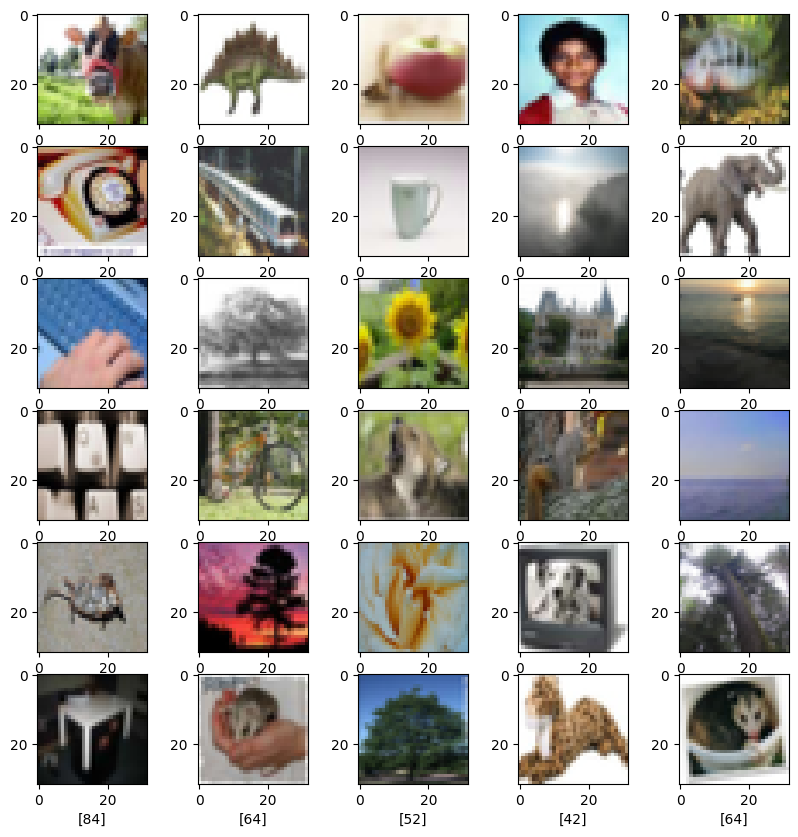

In [8]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.imshow(train_images[i])
    plt.xlabel(train_labels[i])

As we can see images resolution are not good and some of them are almost unrecognizable.  

### View some individual images

array([[[156, 153, 147],
        [151, 151, 143],
        [158, 157, 152],
        ...,
        [145, 143, 130],
        [145, 142, 134],
        [146, 144, 137]],

       [[150, 148, 139],
        [150, 150, 139],
        [156, 155, 150],
        ...,
        [142, 141, 124],
        [147, 144, 134],
        [148, 148, 142]],

       [[145, 143, 134],
        [155, 154, 147],
        [157, 156, 151],
        ...,
        [143, 142, 125],
        [153, 151, 139],
        [152, 150, 145]],

       ...,

       [[139, 137, 125],
        [151, 150, 138],
        [150, 145, 134],
        ...,
        [154, 146, 129],
        [157, 150, 141],
        [160, 157, 151]],

       [[145, 140, 125],
        [149, 149, 138],
        [148, 143, 130],
        ...,
        [153, 144, 132],
        [155, 149, 138],
        [160, 156, 150]],

       [[150, 146, 132],
        [145, 144, 132],
        [150, 147, 133],
        ...,
        [160, 150, 143],
        [157, 151, 139],
        [148, 144, 132]]], dtype=uint8)
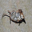

In [11]:
train_images[20]

array([[[ 90,  71,  49],
        [ 61,  45,  30],
        [ 38,  28,  20],
        ...,
        [ 93, 101,  70],
        [ 94,  99,  71],
        [101, 102,  78]],

       [[ 70,  46,  26],
        [ 49,  35,  27],
        [ 81,  79,  78],
        ...,
        [ 91,  93,  63],
        [ 89,  90,  60],
        [ 99,  99,  71]],

       [[ 58,  35,  21],
        [ 65,  55,  54],
        [163, 165, 169],
        ...,
        [127, 129, 115],
        [118, 119, 104],
        [107, 108,  91]],

       ...,

       [[172, 147, 101],
        [166, 141,  87],
        [179, 148,  86],
        ...,
        [150, 123,  70],
        [ 99,  79,  42],
        [ 76,  60,  34]],

       [[170, 144,  91],
        [170, 143,  87],
        [178, 146,  86],
        ...,
        [151, 121,  70],
        [ 99,  76,  37],
        [ 67,  50,  20]],

       [[169, 139,  88],
        [168, 139,  84],
        [180, 145,  86],
        ...,
        [152, 119,  69],
        [122,  95,  52],
        [105,  84,  43]]], dtype=uint8)
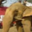

In [12]:
train_images[20000]

---

<br>

### Pre-processing

#### RGB color schema
To undestand what will be done, let's dive a little bit in RGB color schema.  
The RGB (Red, Green, Blue) color code is an additive color model used to represent colors through the combination of three primary colors: red, green, and blue. It is widely used in digital displays, such as monitors, televisions, and cameras, because these devices emit light to create colors.  

#### Color Representation in RGB  
In RGB model, each color is representad by three values, corrspondig to the intensity of red, green and blue.  
The values can vary from 0 to 255 for each color.  
Example:  
* RGB(255, 0, 0) - Pure or 100% red  
* RGB(0, 255, 0) - Pure or 100% green  
* RGB(0, 0, 255) - Pure or 100% blue  

But it is possible to have also combination os two or more colors to form a third one.  
Example:  
* RGB(255, 255, 255): Pure or 100% white
* RGB(0, 0, 0): Black
* RGB(128, 128, 0): Half red and half green that is light yellow.  

<br>

#### Normalization


In [13]:
train_images = train_images / 255
test_images = test_images / 255

I think that it is clear that normalization is mandatory in Artificial Neural Networks training, but after the above introduction about RGB, it is easy to know that if the maximum intensity for each color is 255, then is straighforward that dividing all colors by 255, the new range will be between 0 and 1, instead of 0 and 255.  

<br>

---

### CNN Model training